## DBSCAN

In [51]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import silhouette_score

np.random.seed(42)

# Function for creating data points in the form of a circle
def PointsInCircum(r, n=100):
    return [(math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30),
             math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30)) for x in range(1, n + 1)]

# Generate data points for different circle sizes
points_500 = PointsInCircum(500, 1000)
points_300 = PointsInCircum(300, 700)
points_100 = PointsInCircum(100, 300)

# Create DataFrames for each set of points
df_500 = pd.DataFrame(points_500, columns=['X', 'Y'])
df_300 = pd.DataFrame(points_300, columns=['X', 'Y'])
df_100 = pd.DataFrame(points_100, columns=['X', 'Y'])

# Concatenate the DataFrames
df = pd.concat([df_500, df_300, df_100])

# Adding noise
noise = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)], columns=['X', 'Y'])
df = pd.concat([df, noise])

print(df.head())


            X          Y
0  484.891555 -31.006357
1  489.391178  21.973916
2  462.886575 -27.599889
3  517.218479   5.588090
4  455.669049   1.982181


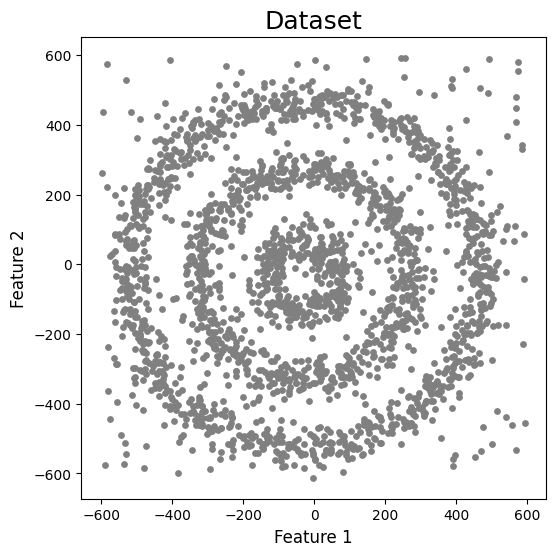

In [30]:
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],s = 15,color = 'grey')
plt.title('Dataset',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

In [31]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(df[['X','Y']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [34]:
df['KMeans_labels']= kmeans.labels_

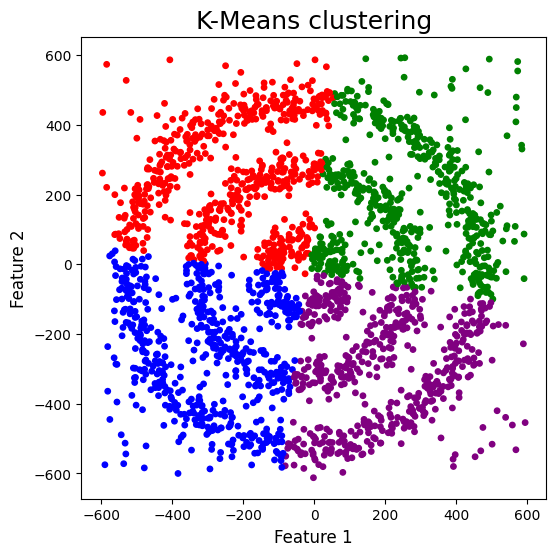

In [37]:
colors = ['purple','red','blue','green']
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],c = df['KMeans_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
plt.title('K-Means clustering',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
model = AgglomerativeClustering(n_clusters = 4,affinity='euclidean')
model.fit(df[['X','Y']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [40]:
df['HR_labels']= model.labels_

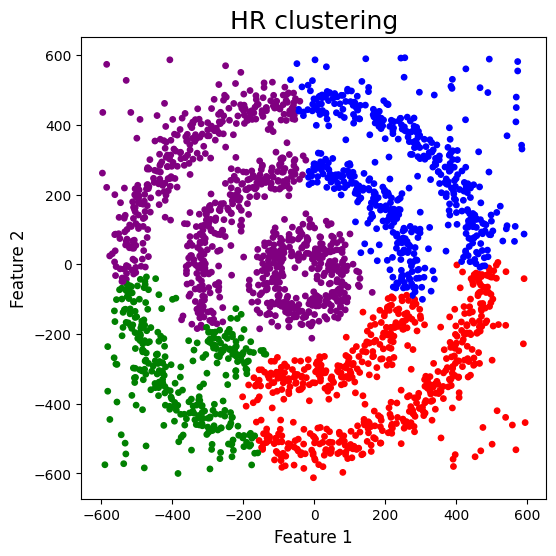

In [41]:
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],c = df['HR_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
plt.title('HR clustering',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(eps = 30,min_samples = 6)
dbscan.fit(df[['X','Y']])

DBSCAN(eps=30, min_samples=6)

In [47]:
df['DBSCAN_opt_labels']= dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()


DBSCAN_opt_labels
 0    1030
 1     730
 2     318
-1     222
Name: count, dtype: int64

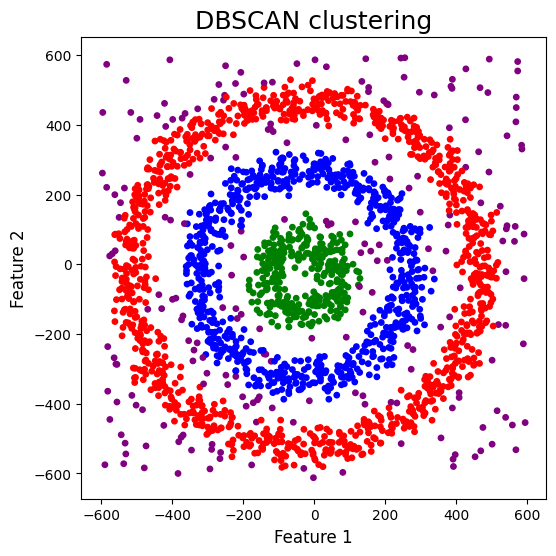

In [48]:
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],c = df['DBSCAN_opt_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
plt.title('DBSCAN clustering',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

In [52]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def maximum_norm(x, y):
    return np.max(np.abs(x - y))

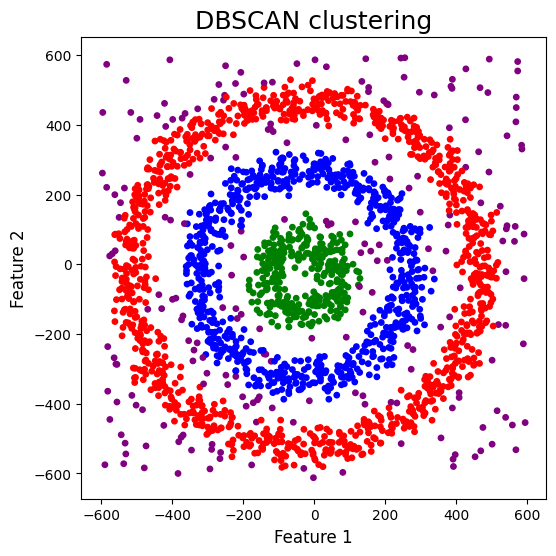

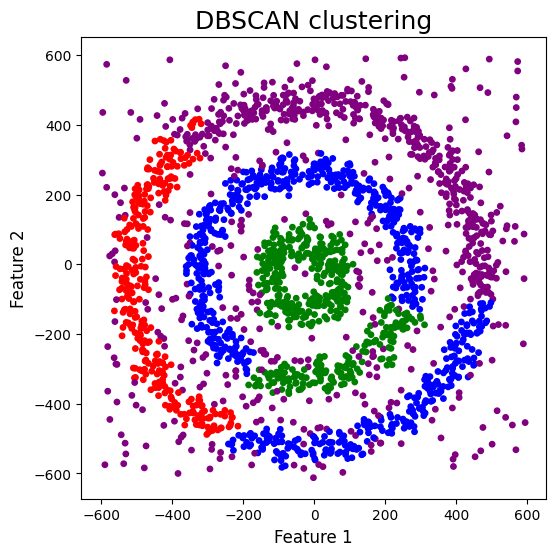

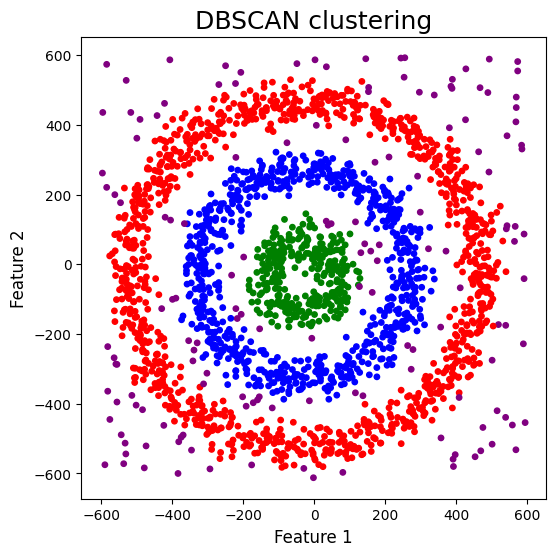

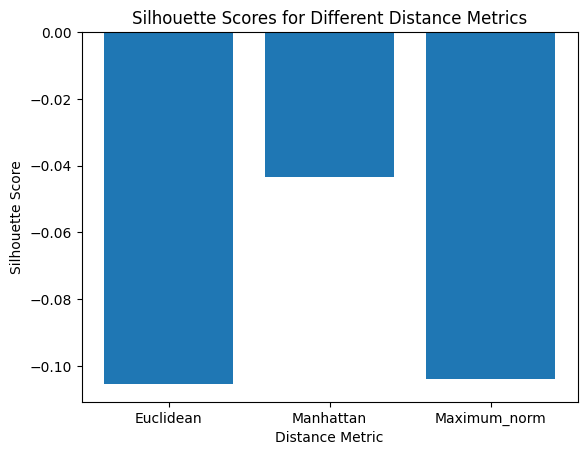

Silhouette Score (Euclidean): -0.11
Silhouette Score (Manhattan): -0.04
Silhouette Score (Maximum_norm): -0.10


In [69]:
# Fit DBSCAN using different distance metrics
distance_metrics = {
    'Euclidean': euclidean_distance,
    'Manhattan': manhattan_distance,
    'Maximum_norm': maximum_norm
}

silhouette_scores = {}

for metric_name, metric_func in distance_metrics.items():
    dbscan = DBSCAN(eps=30, min_samples=6, metric=metric_func)
    dbscan.fit(df[['X', 'Y']])
    df['DBSCAN_opt_labels']= dbscan.labels_
    silhouette_scores[metric_name] = silhouette_score(df[['X', 'Y']], dbscan.labels_)
    plt.figure(figsize = (6,6))
    plt.scatter(df['X'],df['Y'],c = df['DBSCAN_opt_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
    plt.title('DBSCAN clustering',fontsize = 18)
    plt.xlabel('Feature 1',fontsize = 12)
    plt.ylabel('Feature 2',fontsize = 12)
    plt.show()

# Plot silhouette scores as a histogram
plt.bar(range(len(silhouette_scores)), list(silhouette_scores.values()), align='center')
plt.xticks(range(len(silhouette_scores)), list(silhouette_scores.keys()))
plt.xlabel('Distance Metric')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Distance Metrics')
plt.show()
for metric_name, silhouette_score_value in silhouette_scores.items():
    print(f"Silhouette Score ({metric_name}): {silhouette_score_value:.2f}")

In [59]:
# Custom distance metrics
def mahalanobis_distance(x, y, reg_lambda=1e-6):
    cov = np.cov(np.vstack((x, y)).T)
    cov_reg = cov + reg_lambda * np.eye(cov.shape[0])  # Add regularization term
    cov_inv = np.linalg.inv(cov_reg)
    diff = x - y
    return np.sqrt(np.dot(np.dot(diff, cov_inv), diff))

def inner_product_space(x, y):
    return np.dot(x, y)

def hamming_distance(x, y):
    return np.sum(x != y) / len(x)

# Fit DBSCAN using different distance metrics
distance_metrics = {
    'Mahalanobis': mahalanobis_distance,
    'Inner_product_space': inner_product_space,
    'Hamming': hamming_distance
}

silhouette_scores = {}

for metric_name, metric_func in distance_metrics.items():
    dbscan = DBSCAN(eps=30, min_samples=6, metric=metric_func)
    dbscan.fit(df[['X', 'Y']])
    # Check if more than one cluster label is present
    unique_labels = np.unique(dbscan.labels_)
    if len(unique_labels) > 1:
        silhouette_scores[metric_name] = silhouette_score(df[['X', 'Y']], dbscan.labels_)
    else:
        print(f"No meaningful clusters found with {metric_name} metric.")
        silhouette_scores[metric_name] = None  # Set silhouette score to None if no meaningful clusters



No meaningful clusters found with Mahalanobis metric.
No meaningful clusters found with Inner_product_space metric.
No meaningful clusters found with Hamming metric.


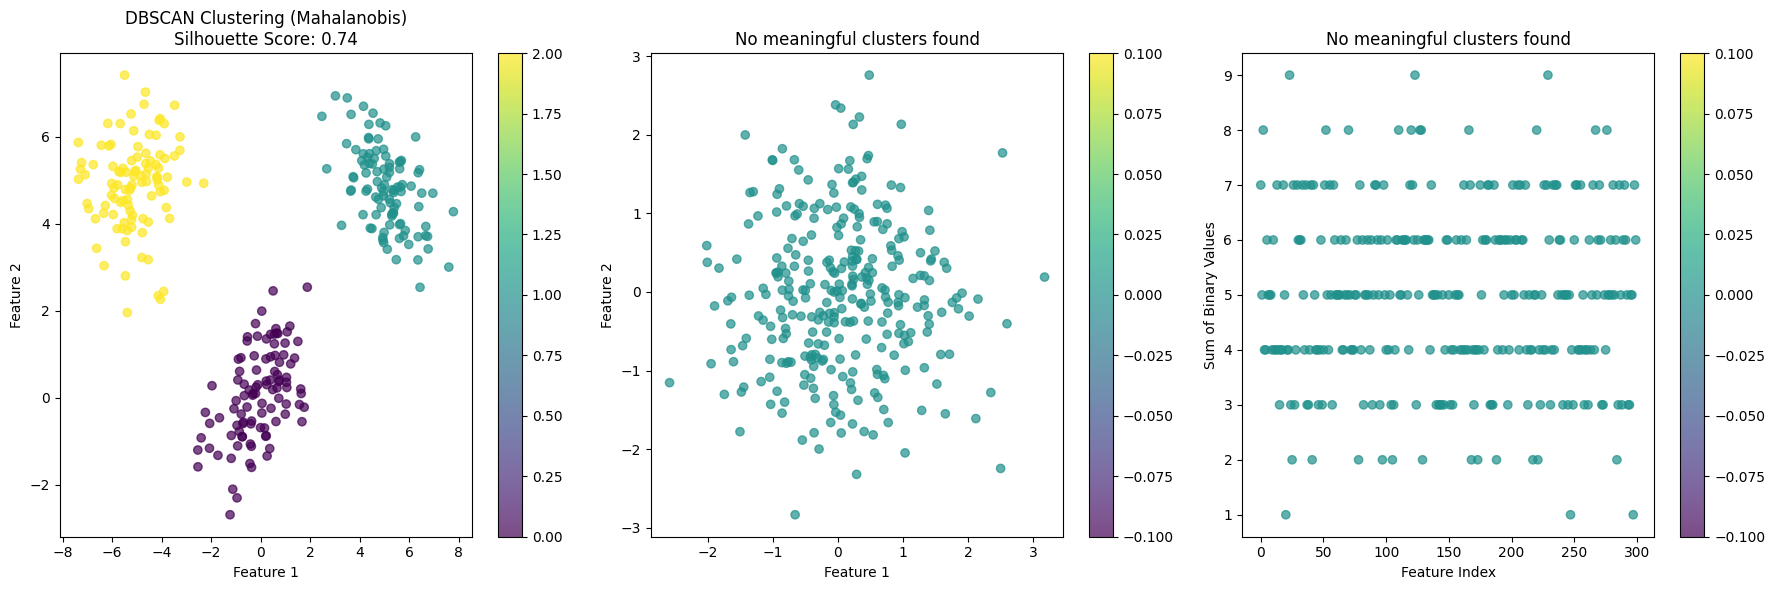

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate sample data for Mahalanobis distance
np.random.seed(0)
X_mahalanobis = np.vstack([
    np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100),
    np.random.multivariate_normal(mean=[5, 5], cov=[[1, -0.5], [-0.5, 1]], size=100),
    np.random.multivariate_normal(mean=[-5, 5], cov=[[1, 0], [0, 1]], size=100)
])

# Generate sample data for Inner Product Space
X_inner_product = np.random.randn(300, 2)  # Random data points

# Generate sample data for Hamming distance
X_hamming = np.random.randint(0, 2, size=(300, 10))  # Random binary data points

# Perform DBSCAN clustering for Mahalanobis distance
covariance_matrix = np.cov(X_mahalanobis, rowvar=False)
dbscan_mahalanobis = DBSCAN(metric='mahalanobis', metric_params={'V': covariance_matrix}).fit(X_mahalanobis)
if len(np.unique(dbscan_mahalanobis.labels_)) > 1:  # Check if clusters were found
    silhouette_score_mahalanobis = silhouette_score(X_mahalanobis, dbscan_mahalanobis.labels_)
else:
    silhouette_score_mahalanobis = None

# Perform DBSCAN clustering for Inner Product Space
dbscan_inner_product = DBSCAN(metric='cosine').fit(X_inner_product)
if len(np.unique(dbscan_inner_product.labels_)) > 1:  # Check if clusters were found
    silhouette_score_inner_product = silhouette_score(X_inner_product, dbscan_inner_product.labels_)
else:
    silhouette_score_inner_product = None

# Perform DBSCAN clustering for Hamming distance
dbscan_hamming = DBSCAN(metric='hamming').fit(X_hamming)
if len(np.unique(dbscan_hamming.labels_)) > 1:  # Check if clusters were found
    silhouette_score_hamming = silhouette_score(X_hamming, dbscan_hamming.labels_)
else:
    silhouette_score_hamming = None

# Visualize clusters
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(X_mahalanobis[:, 0], X_mahalanobis[:, 1], c=dbscan_mahalanobis.labels_, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN Clustering (Mahalanobis)\nSilhouette Score: {silhouette_score_mahalanobis:.2f}' if silhouette_score_mahalanobis is not None else 'No meaningful clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(132)
plt.scatter(X_inner_product[:, 0], X_inner_product[:, 1], c=dbscan_inner_product.labels_, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN Clustering (Inner Product Space)\nSilhouette Score: {silhouette_score_inner_product:.2f}' if silhouette_score_inner_product is not None else 'No meaningful clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(133)
# Repeat the sum of binary values for each x-coordinate
y_hamming = np.sum(X_hamming, axis=1)  # Sum along rows instead of columns
plt.scatter(np.arange(X_hamming.shape[0]), y_hamming, c=dbscan_hamming.labels_, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN Clustering (Hamming)\nSilhouette Score: {silhouette_score_hamming:.2f}' if silhouette_score_hamming is not None else 'No meaningful clusters found')
plt.xlabel('Feature Index')
plt.ylabel('Sum of Binary Values')
plt.colorbar()

plt.tight_layout()
plt.show()
